In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('yahoo_finance/ETFs.csv')
df2 = pd.read_csv('yahoo_finance/MutualFunds.csv')

In [8]:
df2.esg_score.head(20)

0     22.46
1     27.05
2       NaN
3     20.55
4       NaN
5     23.10
6       NaN
7       NaN
8       NaN
9       NaN
10    24.01
11      NaN
12    22.46
13    22.46
14    23.10
15    22.46
16      NaN
17    23.10
18    22.46
19    22.46
Name: esg_score, dtype: float64

SQL in python

In [5]:
import sqlalchemy
import sql_functions as sf
import pandas as pd

In [6]:
schema = 'cgn_analytics_23_2'
sf.get_dataframe(f'SELECT * FROM {schema}."MutualFunds_raw"')


,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,initial_investment,subsequent_investment,fund_category,fund_family,...,peer_environment_avg,peer_environment_max,social_score,peer_social_min,peer_social_avg,peer_social_max,governance_score,peer_governance_min,peer_governance_avg,peer_governance_max
0,AAAAX,MutualFund,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,1000.0,50.0,World Allocation,DWS,...,5.05,10.58,7.43,5.98,9.07,11.30,5.43,4.26,7.14,8.11
1,AAAEX,MutualFund,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,1000000.0,NaN,Health,Virtus,...,1.43,3.27,12.96,9.52,12.87,15.08,8.40,4.96,7.68,10.30
2,AAAFX,MutualFund,US,None,American Century One Choice Blend+ 2015 Portfo...,USD,2500.0,50.0,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAJX,MutualFund,US,None,American Century One Choice Blend+ 2015 Portfo...,USD,2500.0,50.0,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAAGX,MutualFund,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,2000.0,50.0,Large Growth,Thrivent Funds,...,2.70,5.81,10.13,7.25,10.14,11.97,8.03,5.30,7.54,8.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23778,ZVGIX,MutualFund,US,Fidelity Advisor Value Class C,Fidelity Advisor Value Fund Class C,USD,50000.0,500.0,Large Growth,Fidelity Investments,...,2.70,5.81,9.67,7.25,10.14,11.97,6.96,5.30,7.54,8.90
23779,ZVGNX,MutualFund,US,Fidelity Advisor Small Cap Valu,Fidelity Advisor Small Cap Value Fund Class I,USD,2500.0,100.0,Large Growth,Fidelity Investments,...,2.70,5.81,9.67,7.25,10.14,11.97,6.96,5.30,7.54,8.90
23780,ZVNBX,MutualFund,US,Fidelity Convertible Securities,Fidelity Convertible Securities Fund,USD,2500.0,100.0,Large Growth,Fidelity Investments,...,2.70,5.81,10.53,7.25,10.14,11.97,7.25,5.30,7.54,8.90
23781,ZVNIX,MutualFund,US,Fidelity Advisor Small Cap Valu,Fidelity Advisor Small Cap Value Fund Class M,USD,50000.0,500.0,Large Growth,Fidelity Investments,...,2.70,5.81,10.53,7.25,10.14,11.97,7.25,5.30,7.54,8.90


In [7]:
nw_df = sf.get_dataframe(f'SELECT fund_symbol, fund_long_name, esg_score FROM {schema}."MutualFunds_raw" WHERE esg_score IS NOT NULL ORDER BY esg_score DESC LIMIT 20')


In [8]:
nw_df

,fund_symbol,fund_long_name,esg_score
0,RGNCX,Water Island Event-Driven Fund Class A,41.21
1,RSNKX,Appleseed Fund Investor Share,41.21
2,RSNRX,AB Conservative Wealth Strategy Class R,41.21
3,RSNYX,AAM/Phocas Real Estate Fund Class A Shares,41.21
4,GRHAX,Adaptive Tactical Outlook Fund C Class,40.97
5,GRHIX,Columbia Global Technology Growth Fund Institu...,40.97
6,OSPMX,BNY Mellon Active MidCap Fund - Class A,40.05
7,MLPDX,MFS Blended Research Mid Cap Equity Fund R1,40.05
8,SPNNX,BlackRock SMID-Cap Growth Equity Fund Class K,40.05
9,MLPZX,Meeder Tactical Income Fund Adviser Class,40.05


In [9]:
# define a new coloumn called esg_ranking based on esg_score column and sort values in descending order---method min
nw_df['esg_ranking']=nw_df['esg_score'].rank(ascending=False, method='min')
# # show me the output of esg_ranking column and esg_score column and fund_symbol column in descending order-- 
# nw_df[['esg_ranking','esg_score','fund_symbol']].sort_values(by='esg_ranking',ascending=True).head(30)

In [10]:
nw_df

,fund_symbol,fund_long_name,esg_score,esg_ranking
0,RGNCX,Water Island Event-Driven Fund Class A,41.21,1.0
1,RSNKX,Appleseed Fund Investor Share,41.21,1.0
2,RSNRX,AB Conservative Wealth Strategy Class R,41.21,1.0
3,RSNYX,AAM/Phocas Real Estate Fund Class A Shares,41.21,1.0
4,GRHAX,Adaptive Tactical Outlook Fund C Class,40.97,5.0
5,GRHIX,Columbia Global Technology Growth Fund Institu...,40.97,5.0
6,OSPMX,BNY Mellon Active MidCap Fund - Class A,40.05,7.0
7,MLPDX,MFS Blended Research Mid Cap Equity Fund R1,40.05,7.0
8,SPNNX,BlackRock SMID-Cap Growth Equity Fund Class K,40.05,7.0
9,MLPZX,Meeder Tactical Income Fund Adviser Class,40.05,7.0


In [1]:
# Plot number of videos per category
plt.figure(figsize=(15,8)) # specify figure size
f1 = sns.countplot(x=df['category_name']) # create countplot
f1.tick_params(axis='x', rotation=90) # get x-ticks and rotate them
f1.set(xlabel=None) # set no label for x-axis 
f1.set_ylabel("No of videos", fontsize = 10); # set label for y-axis
f1.set_title('Number of videos per category', fontsize=20); # set title

NameError: name 'plt' is not defined

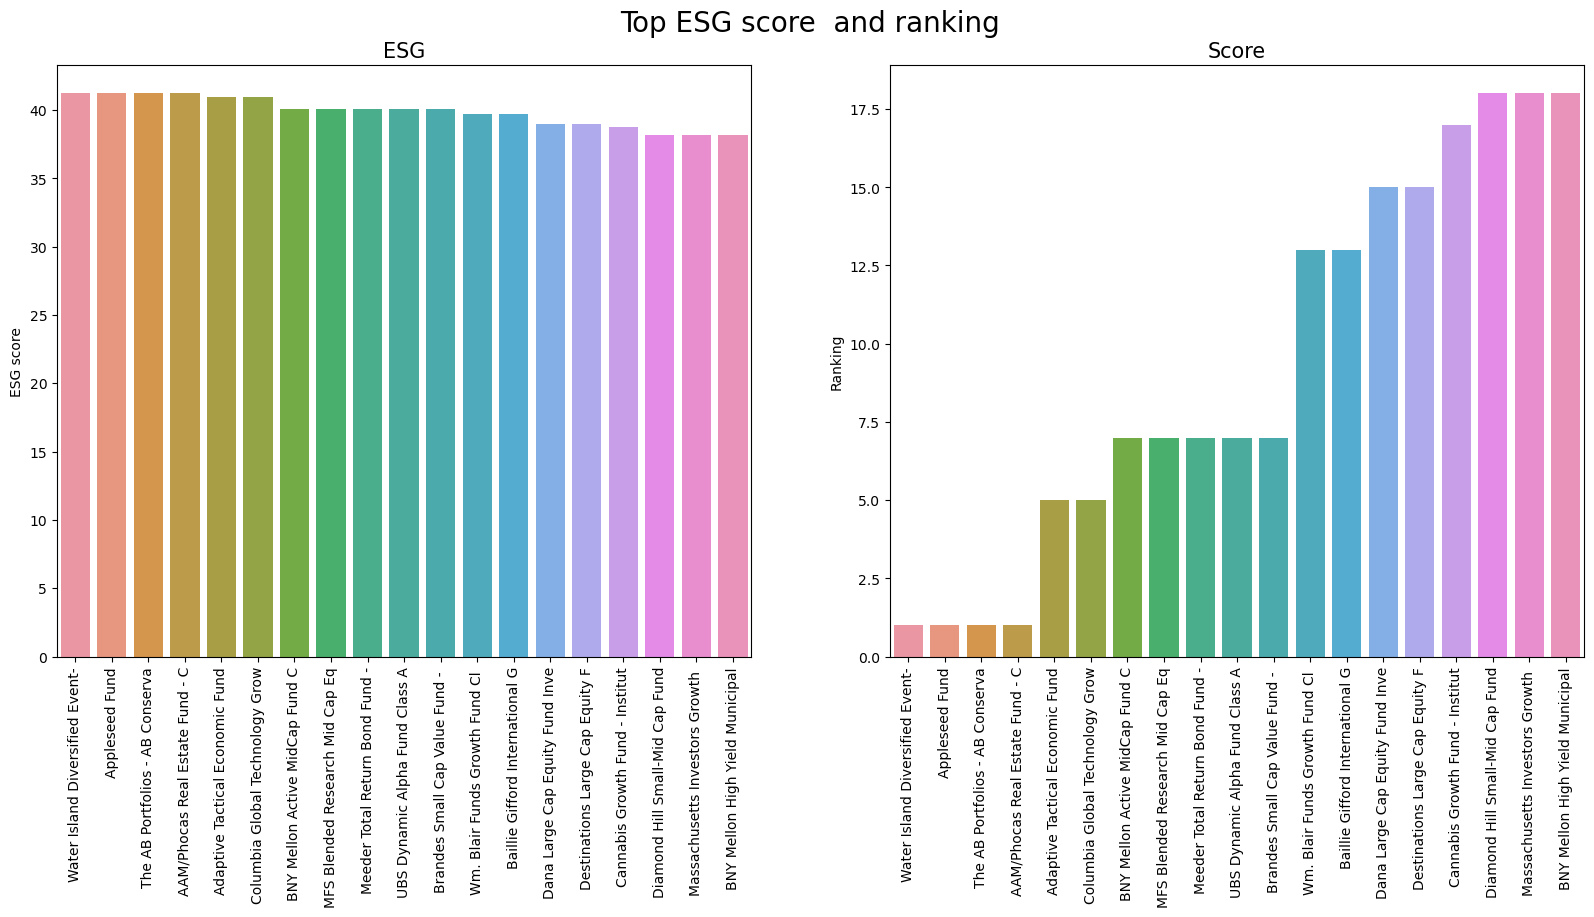

In [60]:
fig, ax = plt.subplots(1,2, figsize=(16,7)) # create subplots on 2 rows and 2 columns
plt.suptitle('Top ESG score  and ranking', fontsize=20) 
fig.tight_layout()   # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .6, wspace = .2, top = .9) # adjusts the space between the single subplots

f1 = sns.barplot(x=nw_df["fund_short_name"], y = nw_df['esg_score'], ax=ax[0]) # creates barchart for number of views
f1.tick_params(axis='x', labelrotation=90) # sets the label y-axis
f1.set(xlabel=None) # sets the x-axis label
f1.set_ylabel("ESG score", fontsize = 10) # limits the x-axis values from 0 to 1000000
f1.set_title("ESG", fontsize = 15);  # sets title for subplot

f2= sns.barplot(x=nw_df["fund_short_name"], y = nw_df['esg_ranking'], ax=ax[1])
f2.tick_params(axis='x', labelrotation=90)
f2.set(xlabel=None)
f2.set_ylabel("Ranking", fontsize = 10)
f2.set_title("Score", fontsize = 15);

# fig.delaxes(ax[0][2]);